# HMM PoS tagger

Part-of-speech tagging is a fundamental natural language processing (NLP) task whose objective is to asssign grammatical categories (e.g. noun, verb or adjective) to words in a sentence. This project focuses on the implementation of a Hidden Markov Model (HMM) based PoS tagger using the Viterbi algorithm, as was seen in the Computational Syntax Class imparted at UPV/EHU, and on the evaluation of the results obtained with this model.

## Corpora

We have primarly worked over two corpora:

**The Georgetown University Multilayer Corpus (GUM) is an open source multilayer corpus of richly annotated texts from 16 text types.**

- https://gucorpling.org/gum/

- Zeldes, Amir (2017) "The GUM Corpus: Creating Multilayer Resources in the Classroom". Language Resources and Evaluation 51(3), 581–612. https://link.springer.com/article/10.1007/s10579-016-9343-x

- https://github.com/UniversalDependencies/UD_English-GUM/blob/master/README.md


**A Genre-Diverse Multilayer Challenge Set for English NLP and Linguistic Evaluation (GENTLE) is a manually annotated multilayer corpus following the same design and annotation layers as GUM, but of unusual text types.**

- https://gucorpling.org/gum/gentle.html

- Aoyama, Tatsuya, Behzad, Shabnam, Gessler, Luke, Levine, Lauren, Lin, Jessica, Liu, Yang Janet, Peng, Siyao, Zhu, Yilun and Zeldes, Amir (2023) "GENTLE: A Genre-Diverse Multilayer Challenge Set for English NLP and Linguistic Evaluation". In: Proceedings of the Seventeenth Linguistic Annotation Workshop (LAW-XVII 2023). Toronto, Canada. https://arxiv.org/abs/2306.01966

- https://github.com/UniversalDependencies/UD_English-GENTLE/blob/master/README.md



There are two particularities to note of our selection:

1.- The GUM corpus is quite big (>200k tokens) and is made up of texts from 16 different domains. These increases the expected performance of our model in a variety of situations, instead of creating a very accurate tool for a very specific domain that falls appart outside of it.

2.- The GENTLE corpus is made up of a variety of texts coming from a selection of domains specifically chosen for being hard to work with, including the likes of Death Threat Letters and Mathematical Proofs. Testing our model against this kind of data will give us an idea of how accurate the initial hypothesis was.


We've also taken a small sample of posts from social media (in particular, from Mastodon). Other than the minimum pre-processing to make the data workable with, we have let is as close to how it came as possible, in order to, once more, test whether a Viterbi-based HMM model based on the GUM corpus is accurate enough.


### PoS Tags

There are 17 unique PoS Tags in the datasets. In the following code chunk the number of tokens per tag is shown followed by the most common lemmas. However, GUM's stats file presents some incosistences regarding the number of tokens per tag (as our algorithm recovers correctly these numbers for the GENTLE case, but are some minimal differences with GUM, we believe the stats file of the repo is wrong). 

It is worth mentioning that exists a _ tag that should be avoided as shown in the following example:

- 12-13	workforce’s	_	_	_	_	_	_	_	_

- 12	workforce	workforce	NOUN	NN	Number=Sing	14	nmod:poss	14:nmod:poss	_

- 13	’s	's	PART	POS	_	12	case	12:case	Entity=42)

Our model correctly avoids this '_' tag.

In [1]:
""" https://github.com/UniversalDependencies/UD_English-GUM/blob/master/stats.xml
<!-- Statistics of universal POS tags. The comments show the most frequent lemmas. -->
<tags unique="17">
<tag name="ADJ">13961</tag><!-- good, other, first, new, many, great, little, large, more, different -->
<tag name="ADP">20170</tag><!-- of, in, to, for, on, with, at, from, by, as -->
<tag name="ADV">10103</tag><!-- so, when, just, then, also, how, now, more, here, really -->
<tag name="AUX">11355</tag><!-- be, have, do, can, will, would, should, could, may, might -->
<tag name="CCONJ">7057</tag><!-- and, or, but, both, &, either, nor, yet, neither, plus -->
<tag name="DET">17331</tag><!-- the, a, this, all, that, some, no, any, every, another -->
<tag name="INTJ">2023</tag><!-- like, yeah, oh, well, so, um, uh, no, okay, yes -->
<tag name="NOUN">35507</tag><!-- person, time, year, day, thing, way, life, city, world, work -->
<tag name="NUM">3994</tag><!-- one, two, 1, three, 2, 3, four, 4, five, 10 -->
<tag name="PART">5113</tag><!-- to, not, 's -->
<tag name="PRON">17819</tag><!-- I, it, you, we, that, they, he, his, this, your -->
<tag name="PROPN">12184</tag><!-- State, President, University, America, York, New, Warhol, Figure, American, south -->
<tag name="PUNCT">28955</tag><!-- ,, ., '', -, ?, (, ), —, [, : -->
<tag name="SCONJ">3393</tag><!-- that, if, as, because, for, of, by, while, in, after -->
<tag name="SYM">317</tag><!-- -, /, $, %, +, =, DKK, €, £, § -->
<tag name="VERB">22277</tag><!-- have, know, go, make, do, get, say, be, take, think -->
<tag name="X">361</tag><!-- _, et, al., de, 1, 1., 2., in, situ, 2 -->
</tags>
"""

""" https://github.com/UniversalDependencies/UD_English-GENTLE/blob/master/stats.xml
<!-- Statistics of universal POS tags. The comments show the most frequent lemmas. -->
<tags unique="17">
<tag name="ADJ">1240</tag><!-- next, other, first, old, open, more, good, straight, chronic, right -->
<tag name="ADP">1588</tag><!-- of, in, to, for, with, on, from, by, at, as -->
<tag name="ADV">729</tag><!-- then, just, so, well, here, also, thus, how, where, now -->
<tag name="AUX">753</tag><!-- be, will, have, can, do, would, may, should, could, shall -->
<tag name="CCONJ">618</tag><!-- and, or, but, &, either, /, plus, yet, both, neither -->
<tag name="DET">1195</tag><!-- the, a, this, all, no, any, that, some, each, every -->
<tag name="INTJ">60</tag><!-- fucking, please, ah, well, oh, okay, so, uh, ha, now -->
<tag name="NOUN">3783</tag><!-- week, x, T, project, school, S, person, day, time, y -->
<tag name="NUM">386</tag><!-- one, 1, 5, 2, two, 4, 3, X, 10, three -->
<tag name="PART">349</tag><!-- to, not, 's -->
<tag name="PRON">1188</tag><!-- I, you, he, it, we, his, that, my, your, they -->
<tag name="PROPN">901</tag><!-- Company, JavaScript, Book, Proposition, Court, English, Week, Career, React, Agreement -->
<tag name="PUNCT">2655</tag><!-- ,, ., :, '', (, ), -, ;, —, ! -->
<tag name="SCONJ">234</tag><!-- that, if, as, because, in, by, like, of, while, before -->
<tag name="SYM">167</tag><!-- ⪯, ∈, =, -, ⋅, /, %, +, $, ≤ -->
<tag name="VERB">1653</tag><!-- have, go, do, get, take, see, follow, make, know, let -->
<tag name="X">300</tag><!-- 1., 2., 3., 4., 5., 6., 7., 8., 9., 10. -->
</tags>
"""

PoS_tags = [
    ("ADJ", 12348, 1621, 1240),
    ("ADP", 17702, 2481, 1588),
    ("ADV", 8989, 1115, 729),
    ("AUX", 10174, 1189, 753),
    ("CCONJ", 6218, 839, 618),
    ("DET", 15224, 2111, 1195),
    ("INTJ", 1859, 164, 60),
    ("NOUN", 31274, 4240, 3783),
    ("NUM", 3554, 440, 386),
    ("PART", 4595, 519, 349),
    ("PRON", 16077, 1746, 1188),
    ("PROPN", 10557, 1627, 901),
    ("PUNCT", 25928, 3027, 2655),
    ("SCONJ", 3053, 340, 234),
    ("SYM", 282, 35, 167),
    ("VERB", 19865, 2479, 1653),
    ("X", 329, 32, 300),
]

### Document type

Documents come from a wide variety of sources. In order to group them in an efficient way, those documents belonging to same area are gathered together. 

For instance, GUM_academic_art, GUM_academic_census... will belong to GUM_academic. 

In the following code block, each distinction is shown.

In [2]:
# https://github.com/UniversalDependencies/UD_English-GUM/tree/master/not-to-release/sources

doc_type_GUM = [
    "GUM_academic",
    "GUM_bio",
    "GUM_conversation",
    "GUM_court",
    "GUM_essay",
    "GUM_fiction",
    "GUM_interview",
    "GUM_letter",
    "GUM_news",
    "GUM_podcast",
    "GUM_speech",
    "GUM_textbook",
    "GUM_vlog",
    "GUM_voyage",
    "GUM_whow",
]

# https://github.com/UniversalDependencies/UD_English-GENTLE/tree/master/not-to-release/sources

doc_type_GENTLE = [
    "GENTLE_dictionary",
    "GENTLE_esports",
    "GENTLE_legal",
    "GENTLE_medical",
    "GENTLE_poetry",
    "GENTLE_proof",
    "GENTLE_syllabus",
    "GENTLE_threat",
]

## HMM implementation

In [ ]:
''' FOR COLAB
!pip install conllu
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install requests
!pip install bs4
!pip install nltk
!pip install openpyxl

!gdown "1BvOY8NQ6kNKMWFtrGKHVVKGd1O9hrv9t&confirm=t"
!unzip data.zip
!rm -rf data.zip
'''

%pip install conllu
%pip install numpy
%pip install pandas
%pip install scikit-learn
%pip install matplotlib
%pip install requests
%pip install bs4
%pip install nltk
%pip install openpyxl

In [3]:
import os
from conllu import parse_incr
from typing import Dict, List, Tuple
from collections import Counter
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup as bs
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('universal_tagset')

[nltk_data] Downloading package punkt_tab to /home/jonapa/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /home/jonapa/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package wordnet to /home/jonapa/nltk_data...
[nltk_data] Downloading package omw-1.4 to /home/jonapa/nltk_data...
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /home/jonapa/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


True

To implement the HMM model, we will follow these steps:

- Initialize the model with three parameters:
    path_data: The directory where all necessary data is stored.
    lemmatize: A flag indicating whether the model should lemmatize the tokens.
    threshold: A percentage threshold that determines which words are kept in the vocabulary. Remaining words will be replaced with the UNK token.

- Prepare the training and testing datasets and verify that the number of tokens per document is correct. For each partition, the data will be stored in a Dict[str, List[List[Tuple[str, str]]]] structure, in which for each document type (key of the Dict) each sentence is a list of tuples in the form (word/lemma, PoS tag).

- To create the vocabulary for the model, we will use only the training dataset to calculate the frequency of each word/lemma. These words/lemmas will be sorted in descending order by frequency. Using the previously set threshold, we will determine the cutoff point for the vocabulary percentage. All words/lemmas above this threshold will be retained in the vocabulary, while the rest will be discarded (and, therefore, considered as UNK). 

- Finally, the emission and transition matrices of the Hidden Markov Model will be calculated. To do this, the following matrices will be computed using the training dataset and then smoothed using Laplace smoothing. Moreover, log probabilities will be used to prevent underflow.

$$ 

\sum_{i=1}^{n} \log \left( \frac{\text{count}(y_{i-1}, y_i) + 1}{\text{count}(y_{i-1}) + |Y|} \right) \quad \text{(Transition)}



+ \sum_{i=1}^{n} \log \left( \frac{\text{count}(y_i, x_i) + 1}{\text{count}(y_i) + |X|} \right) \quad \text{(Emission) }

\\
\text{where } \quad y \text{ is the PoS tag} \quad x \text{ is the word/lemma, } \\
\quad |X| \text{ is the size of the vocabulary, and } \quad |Y| \text{ is the number of tags.}

$$

In [4]:
# Implementation of the HMM model
class HMM_PoS_tagger:
    def __init__(self, path_data: str, lemmatize: bool, threshold: float):
        self.path_data = path_data
        self.lemmatize = lemmatize
        self.threshold = threshold
        self.counter = Counter()  # 12770 unique tokens in train, 188028 total tokens
        # Read data from train and test datasets & check that is correct
        self.train = self.read_train_data()
        self.test_GUM = self.read_test_data(is_GUM=True)
        self.test_GENTLE = self.read_test_data(is_GUM=False)
        # Create vocabulary
        self.vocab = self.create_vocab()
        # Add UNK token to the vocabulary
        self.vocab = ["UNK"] + self.vocab
        # Add START and STOP tags to the tags
        self.tags = ["START", "STOP"] + [x[0] for x in PoS_tags]
        # Train the model and get the emission and transition matrices
        self.emission, self.transition = self.train_model()

    def read_train_data(self) -> Dict[str, List[List[Tuple[str, str]]]]:

        # Train and Dev datasets will be used to train the model
        paths = [
            os.path.join(self.path_data, "en_gum-ud-train.conllu"),
            os.path.join(self.path_data, "en_gum-ud-dev.conllu"),
        ]

        data = self.read_data(paths)

        # Check that number of sentences and tokens per tag are correct
        # Also, update the vocabulary for future processing
        tags_counter = Counter()
        cont_sentences = 0
        for sentences in data.values():
            cont_sentences += len(sentences)
            for sentence in sentences:
                for tok, tag in sentence:
                    tags_counter.update([tag])
                    self.counter.update([tok])

        # Number of sentences is correct
        assert cont_sentences == 9520 + 1341
        # Document types are correct
        assert list(data.keys()) == doc_type_GUM
        # Number of tokens per tag is correct
        assert [(x[0], x[-3]) for x in PoS_tags] == sorted(tags_counter.items())
        return data

    def read_test_data(self, is_GUM: bool) -> Dict[str, List[List[Tuple[str, str]]]]:

        # Both GUM and GENTLE test datasets will be used to evaluate the model
        path = (
            os.path.join(self.path_data, "en_gum-ud-test.conllu")
            if is_GUM
            else os.path.join(self.path_data, "en_gentle-ud-test.conllu")
        )

        data = self.read_data([path])

        # Check that number of sentences and tokens per tag are correct
        cont_sentences = 0
        tags_counter = Counter()

        for sentences in data.values():
            cont_sentences += len(sentences)
            for sentence in sentences:
                for _, tag in sentence:
                    tags_counter.update([tag])

        if is_GUM:
            # Number of sentences is correct
            assert cont_sentences == 1285
            # Document types are correct
            assert list(data.keys()) == doc_type_GUM
            # Number of tokens per tag is correct
            assert [(x[0], x[-2]) for x in PoS_tags] == sorted(tags_counter.items())
        else:
            # Number of sentences is correct
            assert cont_sentences == 1334
            # Document types are correct
            assert list(data.keys()) == doc_type_GENTLE
            # Number of tokens per tag is correct
            assert [(x[0], x[-1]) for x in PoS_tags] == sorted(tags_counter.items())

        return data

    def read_data(self, paths: list[str]) -> Dict[str, List[List[Tuple[str, str]]]]:
        data = {}
        for path in paths:
            assert os.path.exists(path), f"The {path} path does not exist"
            # Name of the read last document type
            last_doc_id = ""
            with open(path, "r", encoding="utf-8") as file:
                for tokenlist in parse_incr(file):
                    if "newdoc id" in tokenlist.metadata:
                        # Get the document type and remove unnecessary additional information
                        doc_type = "_".join(
                            tokenlist.metadata["newdoc id"].split("_")[:2]
                        )
                        # Avoid the first case ("") and change of document type if new is found
                        if doc_type != last_doc_id:
                            last_doc_id = doc_type

                    # Auxiliar list to store in Tuples the tokens and tags of the sentence
                    auxiliar = []
                    for token in tokenlist:
                        # Token has the following internal structure:
                        # token: <class 'conllu.models.Token'> /// dict_keys(['id', 'form', 'lemma', 'upos', 'xpos', 'feats', 'head', 'deprel', 'deps', 'misc'])

                        # Avoid _ case as previously explained
                        if token["upos"] == "_":
                            continue
                        # Possibility to use the lemma or the form of the token
                        auxiliar.append(
                            (
                                token["lemma" if self.lemmatize else "form"].lower(),
                                token["upos"],
                            )
                        )

                    # If the document type is already in the dictionary, append the new data, otherwise, create a new key
                    if doc_type in data:
                        data[doc_type].append(auxiliar)
                    else:
                        data[doc_type] = [auxiliar]
        return data

    def create_vocab(self) -> List[str]:
        # Get the most common tokens in the train dataset
        tokens, times = zip(*self.counter.most_common())
        tokens = np.array(tokens)
        times = np.array(times)

        # Calculate the index of the tokens that are necessary to reach the threshold
        cum_times = np.cumsum(times)
        total_tokens = cum_times[-1]
        idx = np.searchsorted(cum_times, self.threshold * total_tokens)

        return tokens[: idx + 1].tolist()

    def train_model(self) -> Tuple[pd.DataFrame, pd.DataFrame]:
        emission = pd.DataFrame(
            np.zeros((len(self.tags), len(self.vocab)), dtype=np.float64),
            columns=self.vocab,
            index=self.tags,
        )
        transition = pd.DataFrame(
            np.zeros((len(self.tags), len(self.tags)), dtype=np.float64),
            columns=self.tags,
            index=self.tags,
        )

        for sentences in self.train.values():
            previous_tag = "START"
            for sentence in sentences:
                for tok, tag in sentence:
                    if tok not in self.vocab:
                        tok = "UNK"
                    emission.loc[tag, tok] += 1
                    transition.loc[previous_tag, tag] += 1
                    previous_tag = tag
                transition.loc[previous_tag, "STOP"] += 1

        ###############################################################################
        ################################ EMISSION #####################################
        ###############################################################################

        row_sums = emission.sum(axis=1)
        # Convert row_sums to a numpy array otherwise muldimensional indexing error
        row_sums = np.array(row_sums)

        # Considering alpha = 1 for smoothing
        #'''
        emission = np.log2(emission + 1) - np.log2(
            row_sums[:, np.newaxis] + len(self.vocab)
        )
        #'''

        """ Check that the sum of the rows is 1 as it is a probability distribution
        emission = (emission + 1) / (row_sums[:, np.newaxis] + len(self.vocab))
        row_sums_check = emission.sum(axis=1)
        assert np.allclose(row_sums_check, 1), f"Sums of rows must be 1"
        """

        ###############################################################################
        ################################ TRANSITION #################################
        ###############################################################################

        row_sums = transition.sum(axis=1)
        # Convert row_sums to a numpy array otherwise muldimensional indexing error
        row_sums = np.array(row_sums)

        # Considering alpha = 1 for smoothing
        #'''
        transition = np.log2(transition + 1) - np.log2(
            row_sums[:, np.newaxis] + len(self.tags)
        )
        #'''

        """ Check that the sum of the rows is 1 as it is a probability distribution
        transition = (transition + 1) / (row_sums[:, np.newaxis] + len(self.tags))
        row_sums_check = transition.sum(axis=1)
        assert np.allclose(row_sums_check, 1), f"Sums of rows must be 1"
        """

        ###############################################################################

        return emission, transition

In [5]:
PATH_TO_REPO_FOLDER = input(
    "Enter the path to the repository folder (must end in HMM_PoS_Tagger): "
)
# PATH_TO_DATA_FOLDER = "/content/"

PATH_TO_DATA_FOLDER = os.path.join(PATH_TO_REPO_FOLDER, "data")
assert os.path.exists(
    PATH_TO_DATA_FOLDER
), f"The {PATH_TO_DATA_FOLDER} path does not exist"
LEMMATIZE = True
THRESHOLD = 0.9

tagger = HMM_PoS_tagger(path_data=PATH_TO_DATA_FOLDER, lemmatize=LEMMATIZE, threshold=THRESHOLD)

## Viterbi algorithm

The Viterbi algorithm is a dynamic programming method used to find the most probable sequence of states in a Hidden Markov Model (HMM), given a series of observations. The algorithm determines the most likely sequence of hidden states that generated the observed data.
Rather than enumerating all possible tag sequences, it leverages the Markov assumption in the HMM, which states that the probability of each state depends only on the previous one. The algorithm computes the most likely sequence of states by maximizing the joint probability of the observations and the states using a recursive process. This significantly reduces the computational complexity compared to exhaustively exploring all possible sequences.

Mathematically, it is represented as follows:

$$

\text{argmax}_{y \in Y} \prod_{i=1}^{n+1} p(y_i | y_{i-1}) \prod_{i=1}^{n} p(x_i | y_i)

$$


In [1]:
# Implementation of the viterbi algorithm
def viterbi(sentence, init_matrix, transition_matrix, emission_matrix, word_to_index, category_to_index, index_to_category):
    sentence.insert(0, "START")
    #print(sentence)
    num_categories = len(init_matrix) # num categories N
    num_words = len(sentence) # num words in the sentence T

    # viterbi table
    viterbi_table = np.full((num_categories, num_words), -np.inf) # inf for logarithms
    backpointer_table = np.zeros((num_categories, num_words), dtype=int)


    # first step (init)
    for category in range(num_categories):
        #print("CATEGORY: ", index_to_category[category])
        #if index_to_category[category] == "START": 
        #    continue
        word_index = word_to_index.get(sentence[0], word_to_index["UNK"]) # we use UNK tag if the word is not in the vocab
        #result = init_matrix[category] + emission_matrix[category, word_index]
        result = init_matrix[category] + transition_matrix[category_to_index["START"], category]

        #print(result)
        viterbi_table[category, 0] = result # sum because of logs
    # print(viterbi_table)
        

    # recursion step
    for t in range (1, num_words): # from the 2nd to T
        for category in range(num_categories): # from 1 to N
            max_prob = -np.inf
            max_prev_category = 0
            word_index = word_to_index.get(sentence[t], word_to_index["UNK"])
            #print(sentence[t])

            for prev_category in range(num_categories):
                prev_viterbi = viterbi_table[prev_category, t-1]
                transition_score = transition_matrix[prev_category, category]
                '''
                if word_index is not None:
                    emission_score = emission_matrix[category, word_index]
                else:
                    emission_score = 0
                '''
                emission_score = emission_matrix[category, word_index]
                current_prob = prev_viterbi + transition_score + emission_score

                if current_prob > max_prob:
                    max_prob = current_prob
                    max_prev_category = prev_category

            # update tables viterbi and backpointer
            viterbi_table[category, t] = max_prob
            backpointer_table[category, t] = max_prev_category # a la que apunta 

    # final probability step
    max_final_category = np.argmax(viterbi_table[:, -1]) # all the rows of the last column
    max_prob = viterbi_table[max_final_category, -1] # maximum probability is the one in the last column of the max_final category row

    # construct optimal sequence
    optimal_seq = [max_final_category]
    for t in range(num_words-1, 0, -1): # from num_words-1 until 1, backward
        #print(t)
        back_value = backpointer_table[optimal_seq[0], t]
        optimal_seq.insert(0, back_value)

    optimal_tags = [index_to_category[idx] for idx in optimal_seq]
    
    return sentence[1:], optimal_tags[1:], max_prob


First, the input sentence is processed by adding a "START" token at the beginning to mark the start of the sequence. Then, two tables are initialized: the viterbi_table, which will store the accumulated probabilities of the most probable state sequences for each word, and the backpointer_table, which will store the indices of the previous states that led to those maximum probabilities.

The next step is the processing of the first word, the "START" token. For each category, the algorithm calculates the probability of the sequence starting in that category, based on the initial probability and the transition probability from the "START" state. This probability is stored in the viterbi_table, and the backpointer_table is updated with the state that led to the maximum probability.

The algorithm then enters the recursion step for the subsequent words. For each word in the sentence, and for each possible category, the algorithm calculates the probability of that category being the correct one for the current word, considering the accumulated probabilities from the previous states, the transition probabilities between categories, and the emission probabilities of the current word given the category. This probability is calculated as the sum of the probability of the previous state, the transition probability, and the emission probability. The viterbi_table is updated with the maximum probability, and the backpointer_table is adjusted to store the index of the previous state that leads to this maximum probability.

Once all words are processed, the algorithm moves to the final step, where it identifies the category with the maximum probability in the last step (the last word in the sentence). This category represents the most probable state at the end of the sequence.

Finally, the algorithm performs a traceback of the optimal category sequence using the backpointer_table. Starting from the state with the maximum probability at the final step, it traces backward through the time steps to reconstruct the most probable sequence of states.


The following code is a small test to ensure the correct functionality of the Viterbi algorithm. A new sentence is input into the algorithm, and the expected output is the most probable sequence of tags, along with the maximum log probability for the predicted sequence. 


In [ ]:
emission_matrix = tagger.emission
transition_matrix = tagger.transition

'''
print("Transition Matrix:")
print(transition_matrix)
print("Emission Matrix:")
print(emission_matrix)
'''

word_to_index = {word: idx for idx, word in enumerate(tagger.vocab)}
category_to_index = {tag: idx for idx, tag in enumerate(tagger.tags)}
index_to_category = {idx: tag for tag, idx in category_to_index.items()}

# Sentence to try
sentence1 = ["this", "is", "a", "test", "sentence"]
sentence2 = ["for", "another", "test", "sentence"]

sentence = sentence1


# initialize probs
num_categories = len(category_to_index)
init_matrix = np.full(num_categories, -np.inf)
init_matrix[category_to_index["START"]] = 0

# viterbi
checked_sentence, optimal_tags, max_prob = viterbi(
    sentence,
    init_matrix,
    transition_matrix.values,
    emission_matrix.values,
    word_to_index,
    category_to_index,
    index_to_category
)

print("Sentence:", checked_sentence)
print("Optimal Tags:", optimal_tags)
print("Max log probability:", max_prob)


# EXPERIMENTS

Rather than creating a very specific tool, the intention was to make
a model that is able to reliably perform in a wide variety of
categories. 

For this reason, our training corpus is quite big, and includes
data from very different sources. The expected result is for
our model to have as much accuracy on out-of-domain data as possible,
while maintaining a sufficient performance on in-domain data.

As we have already mentioned, to test this hypothesis, we have chosen the GENTLE corpus,
made specifically of unusual text types including mathematical proofs and dictionary
entries, among others.

### In-domain

First of all, we need to define a function that evaluates our model.
We will tell this function which of our two test datasets (GUM or GENTLE)
to take to evaluate the model against, and a domain of said datasets.

The function will then print the precision and recall by tag, as well
as the total accuracy and the confusion matrix. The function should also
return the total number of mistakes and tokens, so we can more easily operate
with them.

In [8]:
#This function calculates the precision and recall of our model
#for each tag for a given domain, as well as the total accuracy of our model
#where Acc = 100 - (100*NumMistakes/NumTokens)
def evaluate(isGUM: bool, domain: str, show_data:bool):

    #Check if the domain exists for the 2 corpuses we have been working with
    if isGUM:
        assert domain in doc_type_GUM, f"The domain {domain} is not in the GUM dataset"
        test = tagger.test_GUM[domain]
    else:
        assert (
            domain in doc_type_GENTLE
        ), f"The domain {domain} is not in the GENTLE dataset"
        test = tagger.test_GENTLE[domain]

    #list_gold contains all of the actual tags for each token
    #list_pred cointains the tags our model predicts
    list_gold, list_pred = [], []
    total_mistakes, total_tokens = 0, 0

    #Iterate through each of the sentences and then through each of the tokens
    #It's important to remember our data is stored in tuples (token, tag)
    for idx in range(len(test)):
        newSent = [tok for tok, _ in test[idx]]
        gold_tags = [tag for _, tag in test[idx]]
        total_tokens += len(newSent)
        list_gold.extend(gold_tags)

        checked_sentence, predicted_tags, _ = viterbi(
            newSent,
            init_matrix,
            transition_matrix.values,
            emission_matrix.values,
            word_to_index,
            category_to_index,
            index_to_category,
        )
        
        #Make sure the pre-processing of the data is correct by comparing lengths 
        assert ["START"] + checked_sentence == newSent, f"The sentence is not the same"
        assert len(gold_tags) == len(
            predicted_tags
        ), f"The length of the tokenized sentence and the predicted tags is not the same"
        list_pred.extend(predicted_tags)

        total_mistakes += sum(
            1 for pred, gold in zip(predicted_tags, gold_tags) if pred != gold
        )

    #print("Total number of mistakes: "  + str(total_mistakes))
    #print("% of mistakes: " + str(100 - (100 * total_mistakes / total_tokens)))

    if show_data == True:

        #Create and print the classification report using the sklearn library
        report = classification_report(list_gold, list_pred, zero_division=0, digits=4)
        print(report)


        #Create and print the confusion matrix. The confusion matrix looks very pretty (thanks, jon!)
        cm = confusion_matrix(list_gold, list_pred, labels=tagger.tags)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tagger.tags)
        fig, ax = plt.subplots(figsize=(20,20))

        disp.plot(ax=ax)

    return total_mistakes, total_tokens
    

Our model has two parameteres to tune it:

The threshold: How rare a word has to be to be tagged as "UNK". The higger this number, the less words
will be "UNK". As the corpus chosen to train this model is quite big (200k tokens), the initial assumption
is that this threshold will be quite high, for a lot of different words will naturally occur in train data.
As testing for every 1% increment would take way too long and very low numbers are expected to perform worse,
a small sample of the most likely to be the best thresholds has been manually chosen.

Lemmatization: Whether we are working with words or lemmas. If TRUE, the test data is also lemmatized. 

In [9]:

#Keep into account that given the large amounts of data we are working with, executing this cell might take close to 30 minutes

thresholds = [0.85, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1]
lemmatization = [False, True]

#max accuracy
accmax = 0
for threshold in thresholds:
    for lemma in lemmatization:

        #process the data with the given parameters
        tagger = HMM_PoS_tagger(path_data=PATH_TO_DATA_FOLDER, lemmatize=lemma, threshold=threshold)

        #variables to send the viterbi
        emission_matrix = tagger.emission
        transition_matrix = tagger.transition

        word_to_index = {word: idx for idx, word in enumerate(tagger.vocab)}
        category_to_index = {tag: idx for idx, tag in enumerate(tagger.tags)}
        index_to_category = {idx: tag for tag, idx in category_to_index.items()}

        # initialize probs
        num_categories = len(category_to_index)
        init_matrix = np.full(num_categories, -np.inf)
        init_matrix[category_to_index["START"]] = 0

        #total mistakes and tokens
        ttm = 0
        ttt = 0

        for domain in doc_type_GUM:

            #keep count of mistakes and tokens between domains to calculate accuracy
            tm, tt = evaluate(isGUM=True, domain=domain, show_data=False)
            ttm += tm
            ttt += tt

            #compare accuracy and save parameters that give the highest

        acc = (100 - (100 * (ttm/ttt)))
        if (acc > accmax):
            accmax = acc
            l = lemma
            t = threshold
            

print(l)
print(t)
print(accmax)

True
0.97
86.89023120183295


We get the best result when lemmatizing and using a threshold of 97% (that is, the 3% of less common lemmas is turned into UNK).
This model gives us an overall accuracy of 86.89%, which is quite good if we take into account how different the categories of our corpus were to each other.

Let's see how the different categories of GUM perform with this parameters:

In [10]:
#process the data with the given parameters
tagger = HMM_PoS_tagger(path_data=PATH_TO_DATA_FOLDER, lemmatize=True, threshold=0.97)

#variables to send the viterbi
emission_matrix = tagger.emission
transition_matrix = tagger.transition

word_to_index = {word: idx for idx, word in enumerate(tagger.vocab)}
category_to_index = {tag: idx for idx, tag in enumerate(tagger.tags)}
index_to_category = {idx: tag for tag, idx in category_to_index.items()}

# initialize probs
num_categories = len(category_to_index)
init_matrix = np.full(num_categories, -np.inf)
init_matrix[category_to_index["START"]] = 0

In [11]:

for domain in doc_type_GUM:
    print("----------------------------------------------------------------------------------------------------")
    print(f"-------------------------------------------{domain}------------------------------------------------")
    print("----------------------------------------------------------------------------------------------------")
    mis, tok = evaluate(isGUM=True, domain=domain, show_data=False)
    print("The accuracy for " + str(domain) + " is: " + str(100-(100 * mis/tok)))
    print("####################################################################################################")
    print("####################################################################################################")


----------------------------------------------------------------------------------------------------
-------------------------------------------GUM_academic------------------------------------------------
----------------------------------------------------------------------------------------------------
The accuracy for GUM_academic is: 84.84383000512032
####################################################################################################
####################################################################################################
----------------------------------------------------------------------------------------------------
-------------------------------------------GUM_bio------------------------------------------------
----------------------------------------------------------------------------------------------------
The accuracy for GUM_bio is: 84.45503275759381
############################################################################################

The best performing categories are Conversations (92.3%) and Vlogs (90.5%).
The worst performing categories are News(84,3%) and Biographies(84,5).

We could have probably gotten higher numbers for each of these categories had the model
been trained specifially for them. Let's now print the specifics of the data for the best
and worst perfoming domains, and then see whether this loss of accuracy paid off by checking
if our model is able to keep up with the purposely chosen for being hard to work with domains of GENTLE



              precision    recall  f1-score   support

         ADJ     0.7963    0.8958    0.8431        48
         ADP     0.8537    0.9813    0.9130       107
         ADV     0.8908    0.7571    0.8185       140
         AUX     0.9108    0.9346    0.9226       153
       CCONJ     1.0000    1.0000    1.0000        54
         DET     0.9483    0.9322    0.9402       118
        INTJ     0.9000    0.7941    0.8438       102
        NOUN     0.9080    0.9193    0.9136       161
         NUM     1.0000    0.9167    0.9565        12
        PART     1.0000    1.0000    1.0000        48
        PRON     0.9515    0.9833    0.9671       299
       PROPN     0.4800    0.5455    0.5106        22
       PUNCT     0.9973    1.0000    0.9986       365
       SCONJ     0.8000    0.6667    0.7273        24
        STOP     0.0000    0.0000    0.0000         0
        VERB     0.8952    0.8910    0.8931       211
           X     0.0000    0.0000    0.0000         4

    accuracy              

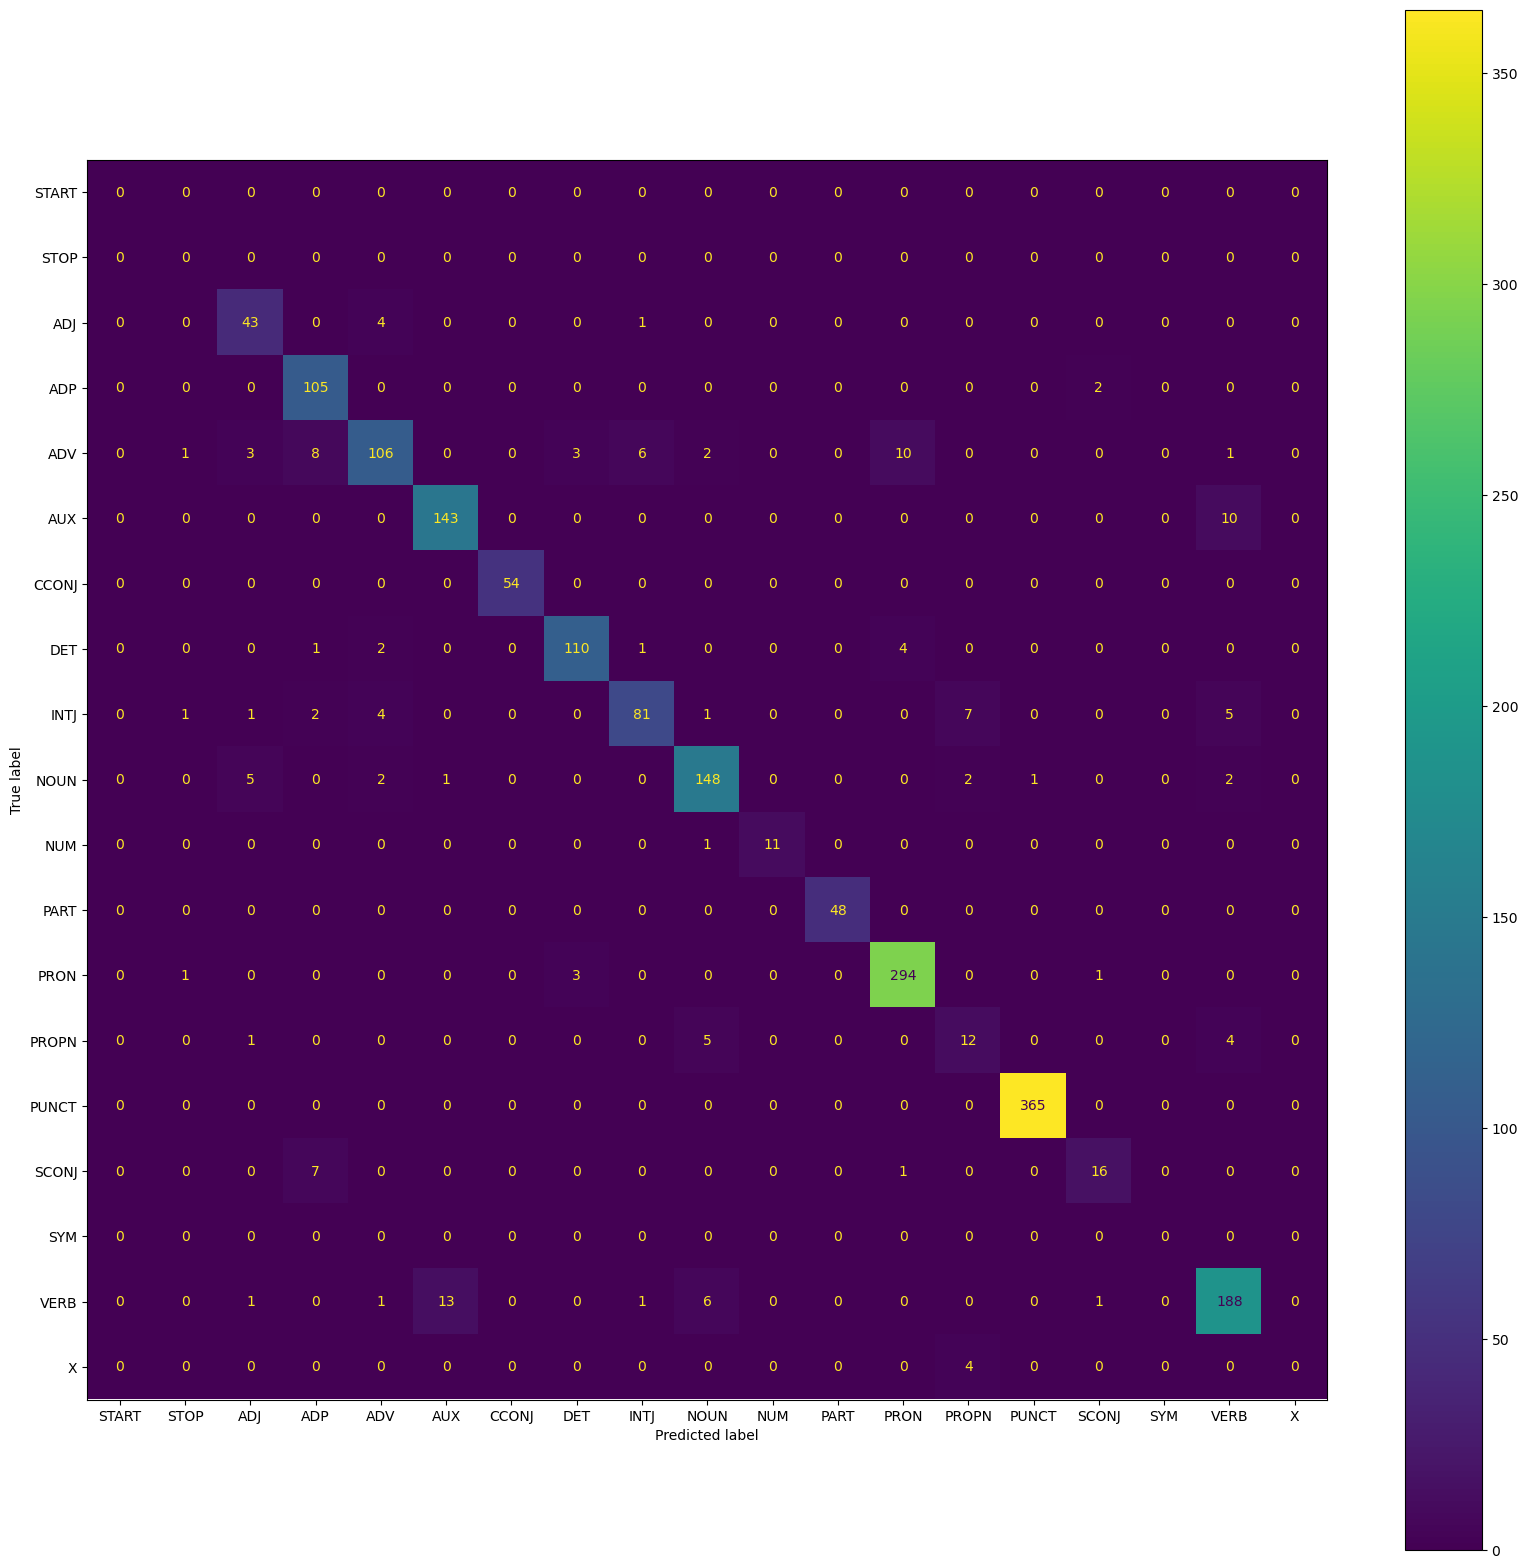

In [12]:
_ , _ = evaluate(isGUM=True, domain="GUM_conversation", show_data=True)

              precision    recall  f1-score   support

         ADJ     0.6838    0.8611    0.7623       108
         ADP     0.9224    0.9951    0.9573       203
         ADV     0.9394    0.7561    0.8378        41
         AUX     0.9670    0.9888    0.9778        89
       CCONJ     1.0000    0.9811    0.9905        53
         DET     0.8894    0.9944    0.9390       178
        INTJ     0.0000    0.0000    0.0000         0
        NOUN     0.7010    0.8267    0.7587       329
         NUM     0.9730    0.7200    0.8276        50
        PART     0.8409    0.9487    0.8916        39
        PRON     0.9403    0.9844    0.9618        64
       PROPN     0.8145    0.5471    0.6545       329
       PUNCT     0.9828    1.0000    0.9913       228
       SCONJ     0.8750    0.5385    0.6667        13
        STOP     0.0000    0.0000    0.0000         0
         SYM     0.0000    0.0000    0.0000         0
        VERB     0.9014    0.7665    0.8285       167

    accuracy              

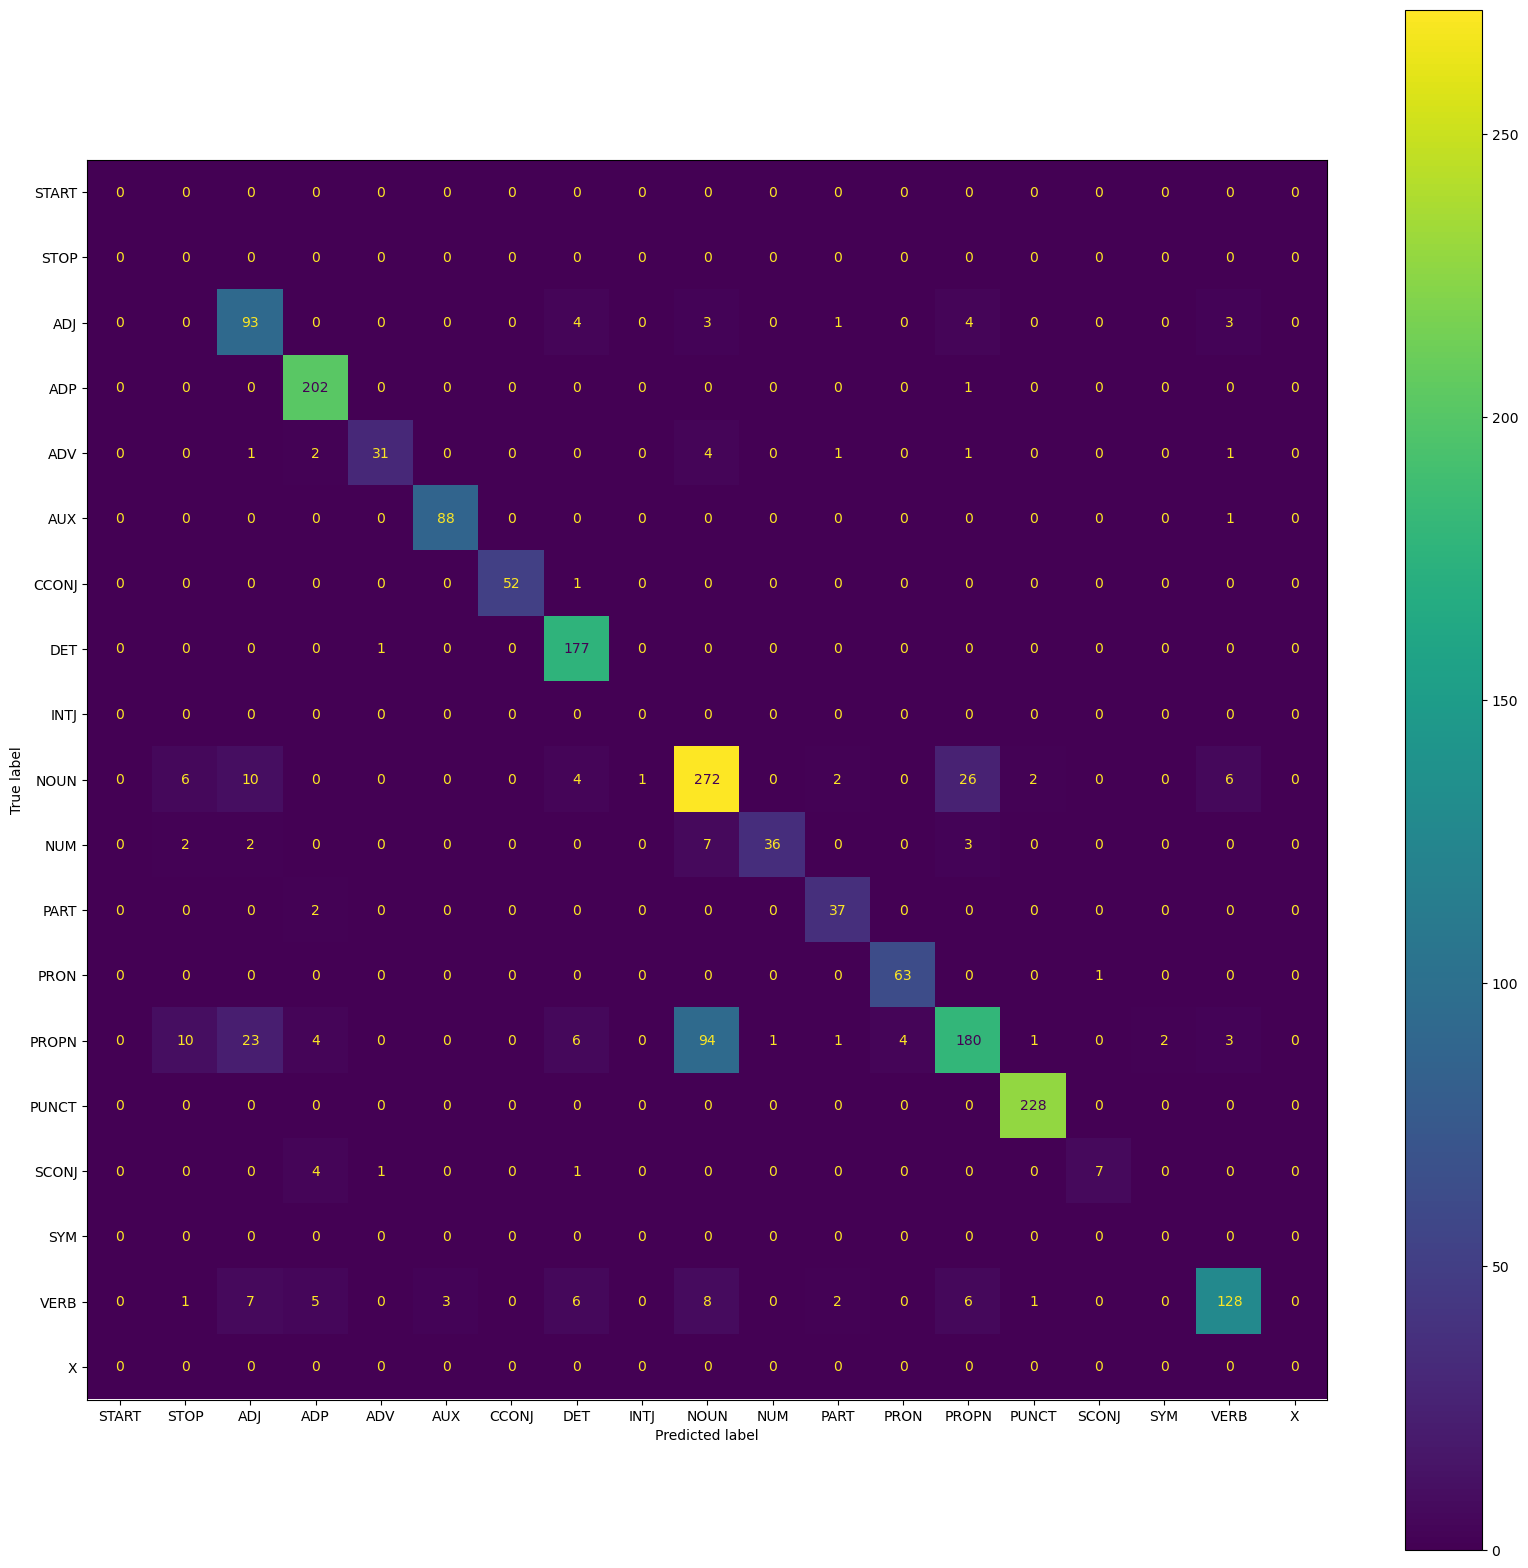

In [13]:
_ , _ = evaluate(isGUM=True, domain="GUM_news", show_data=True)

Two interesting things to note here:

1.- The confussion matrix shows a pattern of mixing Nouns and Proper Nouns. 

2.- Our model sometimes predicts STOP in the middle of the sentence. A deep look into why this was the case revealed it always happens after a SYM, given the amount of times this sequence appears in our training data.

### Out-of-domain

For the same parameters we had before, let's see how well the model performs over the GENTLE corpus

In [14]:

for domain in doc_type_GENTLE:
    print("----------------------------------------------------------------------------------------------------")
    print(f"-------------------------------------------{domain}------------------------------------------------")
    print("----------------------------------------------------------------------------------------------------")
    mis, tok = evaluate(isGUM=False, domain=domain, show_data=False)
    print("The accuracy for " + str(domain) + " is: " + str(100-(100 * mis/tok)))
    print("####################################################################################################")
    print("####################################################################################################")

----------------------------------------------------------------------------------------------------
-------------------------------------------GENTLE_dictionary------------------------------------------------
----------------------------------------------------------------------------------------------------
The accuracy for GENTLE_dictionary is: 81.43564356435644
####################################################################################################
####################################################################################################
----------------------------------------------------------------------------------------------------
-------------------------------------------GENTLE_esports------------------------------------------------
----------------------------------------------------------------------------------------------------
The accuracy for GENTLE_esports is: 87.80828292228944
####################################################################

The model is able to perform reasonably well on very specific domains (it gets closes to 90% accuracy on Esports commentary and Deah threats), however, the more specific a domain is, the worse it performs. By the point it gets to Mathematical proofs, it has a meager 70% accuracy.

Once again, lets see all the data from the best performing and worst performing domains.

              precision    recall  f1-score   support

         ADJ     0.7117    0.6991    0.7054       113
         ADP     0.9235    0.9679    0.9452       187
         ADV     0.7931    0.8440    0.8178       109
         AUX     0.8402    0.9819    0.9056       166
       CCONJ     1.0000    0.9848    0.9924        66
         DET     0.9530    0.9726    0.9627       146
        INTJ     0.7143    0.2174    0.3333        23
        NOUN     0.8669    0.8215    0.8436       325
         NUM     1.0000    0.7143    0.8333        28
        PART     0.9259    0.9868    0.9554        76
        PRON     0.9677    0.9792    0.9735       337
       PROPN     0.4727    0.5200    0.4952        50
       PUNCT     0.9630    1.0000    0.9811       182
       SCONJ     0.7941    0.5870    0.6750        46
        STOP     0.0000    0.0000    0.0000         0
         SYM     0.0000    0.0000    0.0000         1
        VERB     0.8953    0.8611    0.8779       288
           X     0.0000    

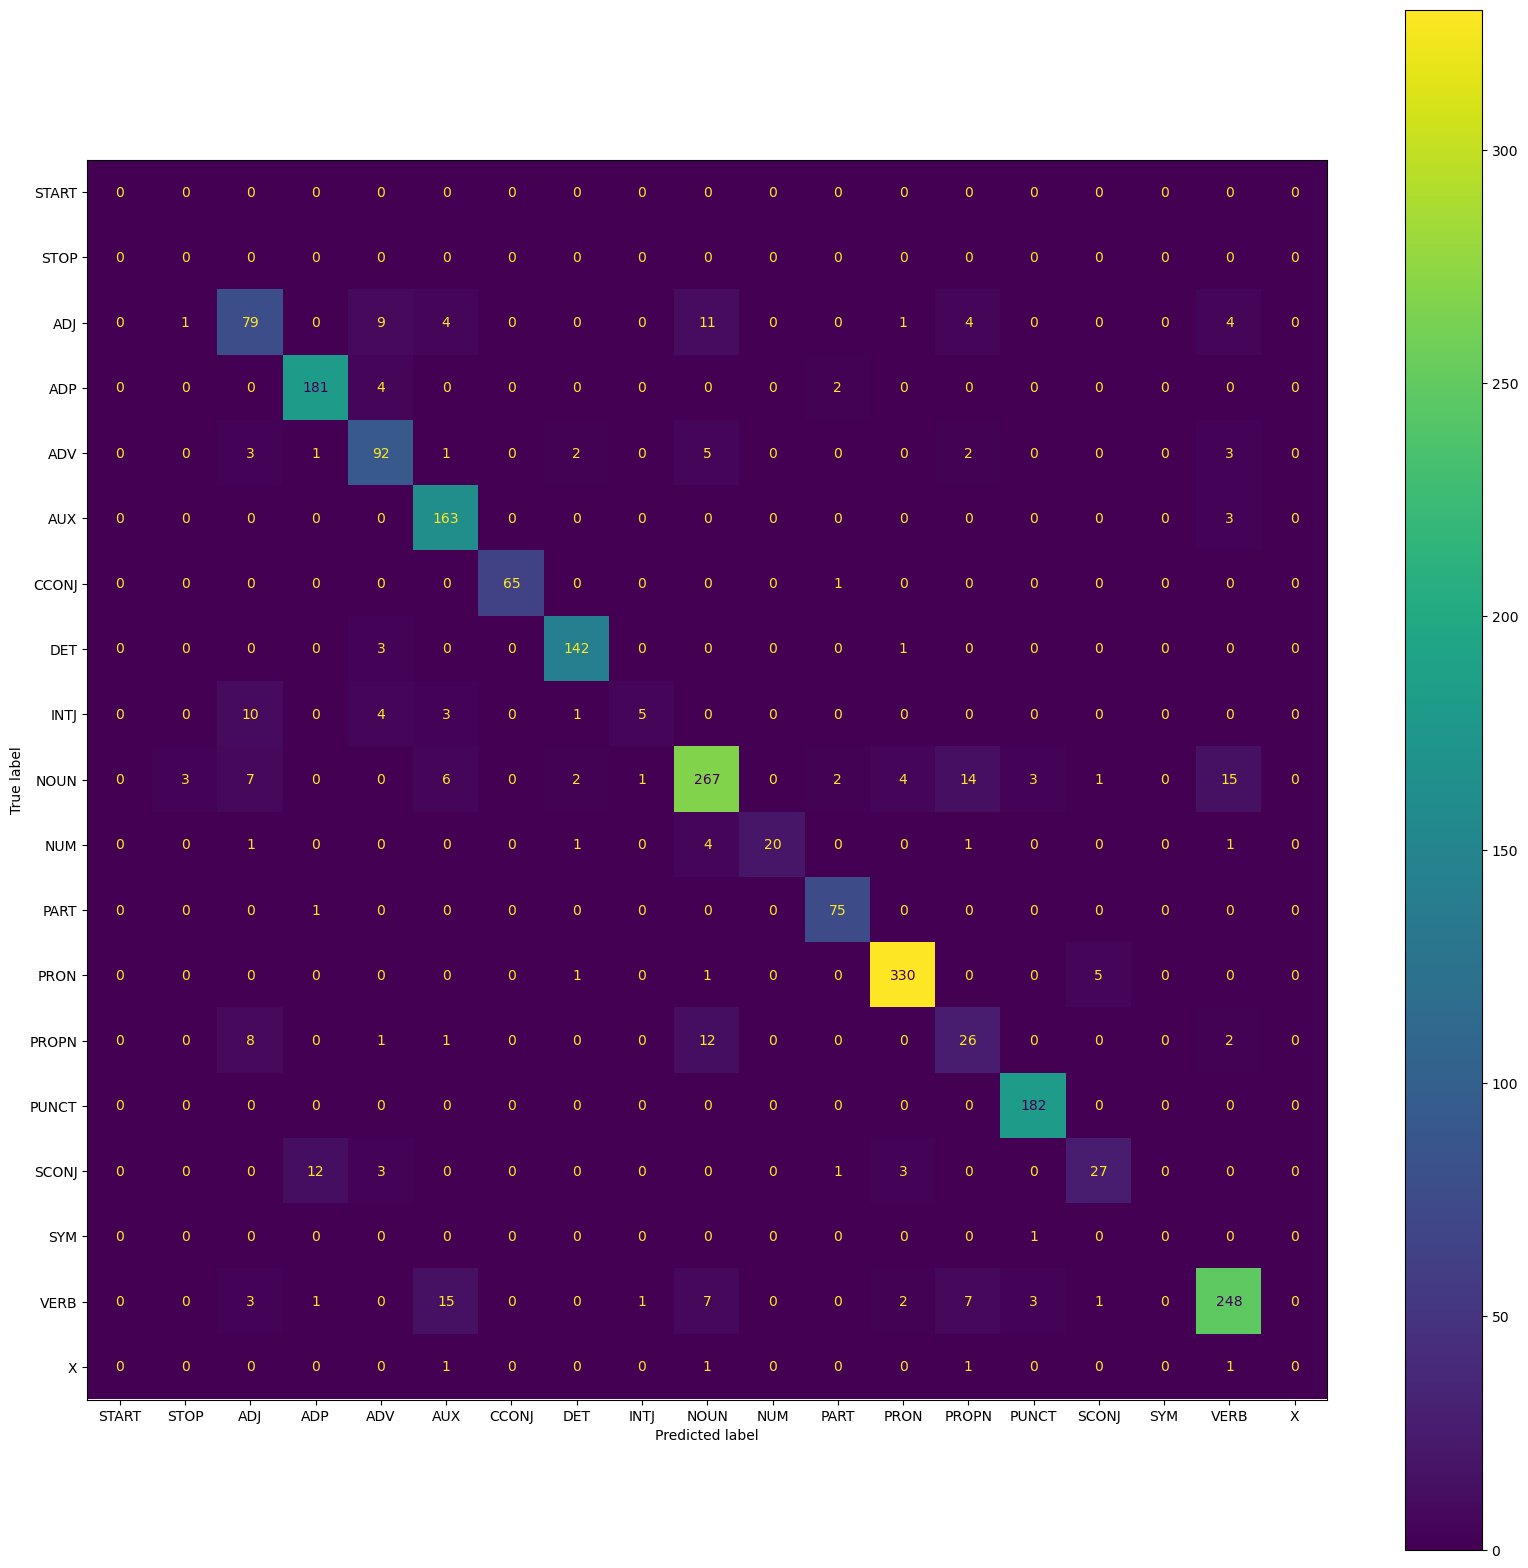

In [15]:
_ , _ = evaluate(isGUM=False, domain="GENTLE_threat", show_data=True)

              precision    recall  f1-score   support

         ADJ     0.6222    0.6364    0.6292       132
         ADP     0.8844    0.9660    0.9234       206
         ADV     0.9494    0.7009    0.8065       107
         AUX     0.9091    1.0000    0.9524       110
       CCONJ     1.0000    0.9661    0.9828        59
         DET     0.7899    0.9909    0.8790       110
        INTJ     0.0000    0.0000    0.0000         0
        NOUN     0.8107    0.4652    0.5911       617
         NUM     0.8261    0.7308    0.7755        52
        PART     0.6250    1.0000    0.7692        10
        PRON     0.7808    1.0000    0.8769        57
       PROPN     0.0507    0.4500    0.0911        40
       PUNCT     0.9900    0.9867    0.9883       300
       SCONJ     0.9545    0.4468    0.6087        47
        STOP     0.0000    0.0000    0.0000         0
         SYM     0.8750    0.0556    0.1045       126
        VERB     0.7368    0.8421    0.7860       133

    accuracy              

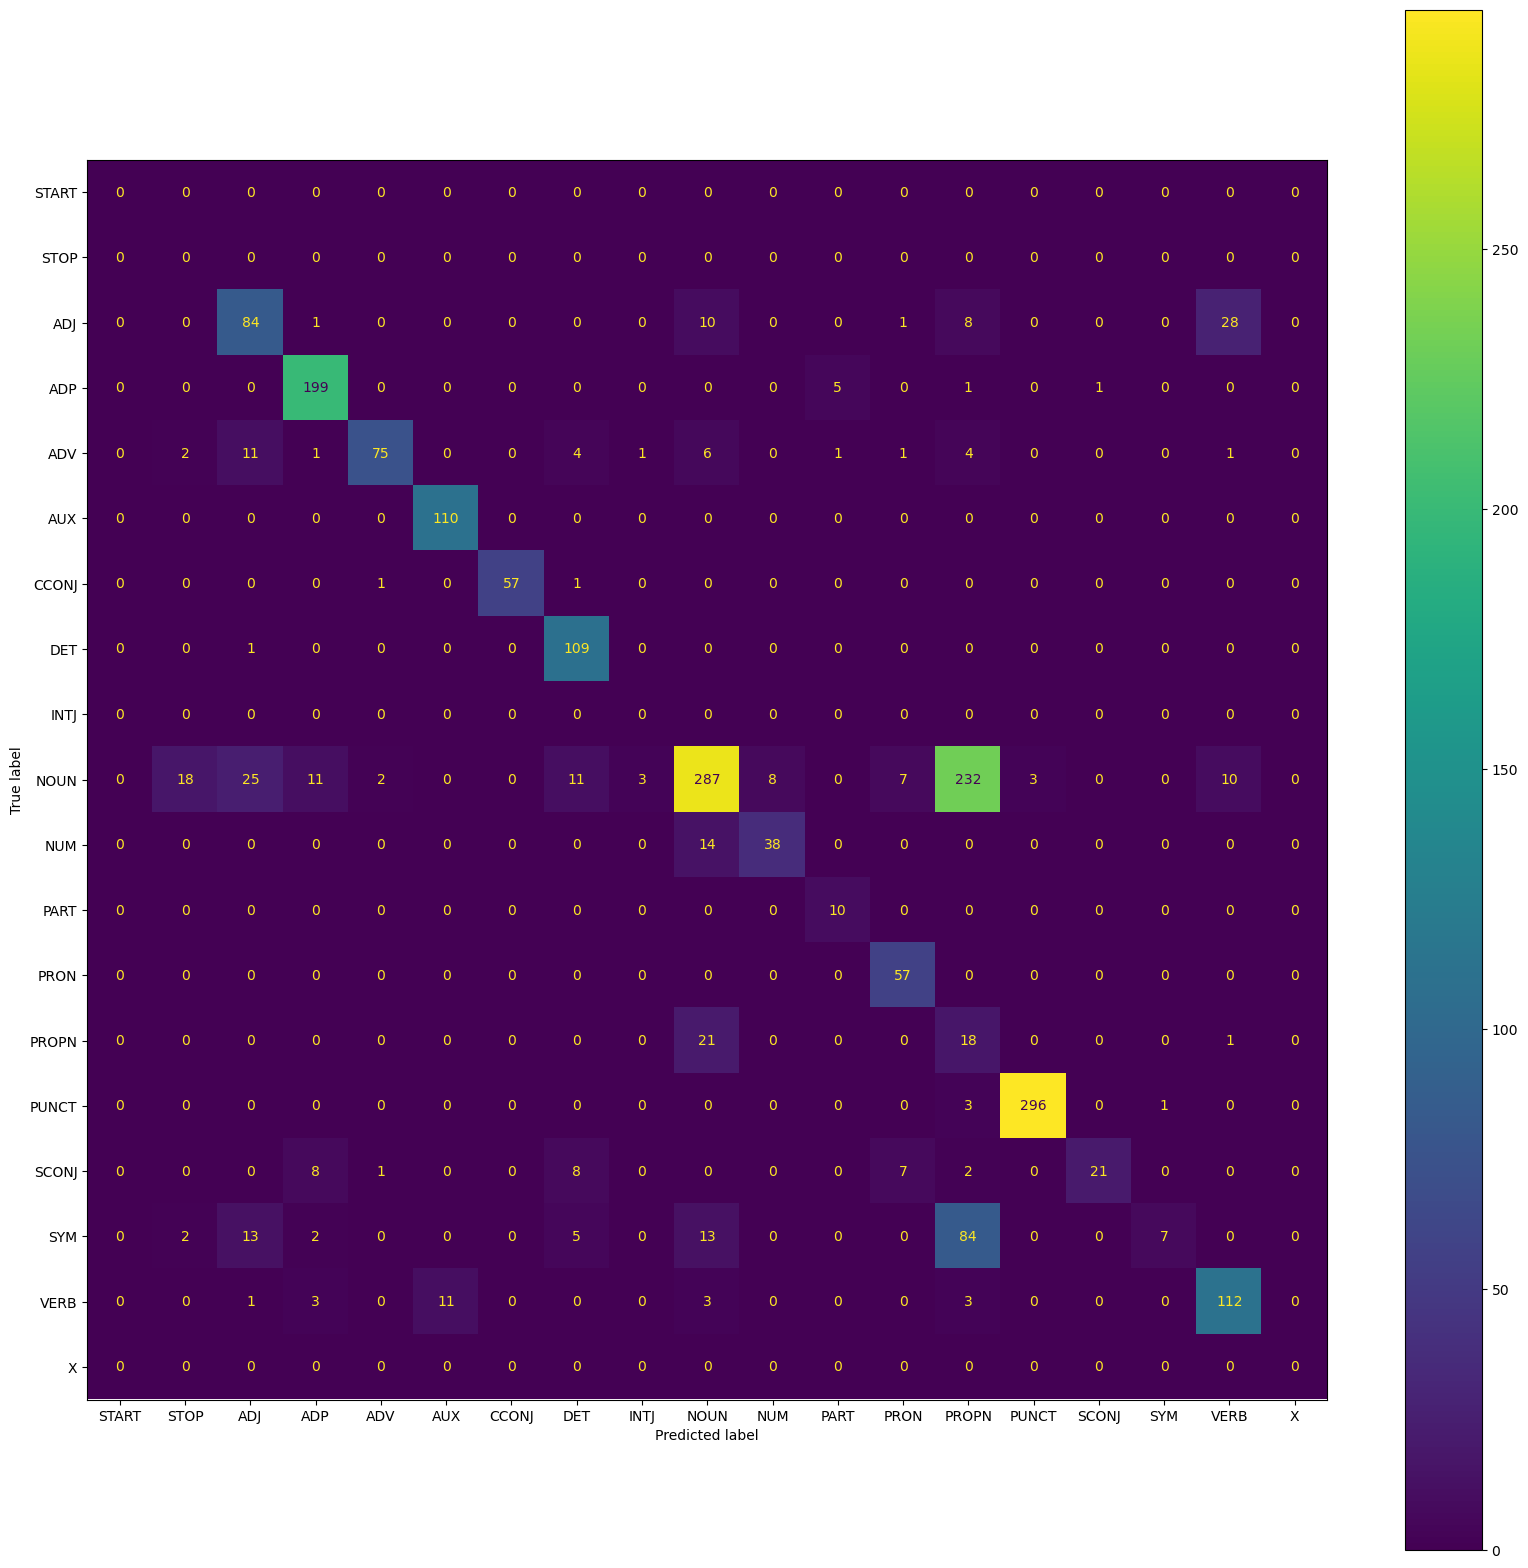

In [16]:
_ , _ = evaluate(isGUM=False, domain="GENTLE_proof", show_data=True)

Similar patterns to those observed in the in-domain section can be observed. For Mathematical Proofs, Nouns seem to be mistagged as Proper Nouns even more than before.

In addition, data will be retrieved from "Mastodon" social media to further analyze the performance of the model. 


Mastodon is the platform from which we will obtain quotes or phrases to work with and use as inputs to evaluate Viterbi algorithm. It offers a wide variety of content generated by users from different communities and interests, and its diversity makes it a rich source for collecting texts that we can analyze.

The aim will be to extract toots from Mastodon and use them as examples to evaluate how the Viterbi algorithm processes text sequences. The textual and linguistic structure of Mastodon, not being heavily moderated by algorithms as in other platforms, presents a more realistic and less standardised scenario, which is ideal for testing models in more varied and natural conditions.

In [17]:
#process the data with the given parameters
tagger = HMM_PoS_tagger(path_data=PATH_TO_DATA_FOLDER, lemmatize=True, threshold=0.97)

#variables to send the viterbi
emission_matrix = tagger.emission
transition_matrix = tagger.transition

word_to_index = {word: idx for idx, word in enumerate(tagger.vocab)}
category_to_index = {tag: idx for idx, tag in enumerate(tagger.tags)}
index_to_category = {idx: tag for tag, idx in category_to_index.items()}

# initialize probs
num_categories = len(category_to_index)
init_matrix = np.full(num_categories, -np.inf)
init_matrix[category_to_index["START"]] = 0

The following code collects Mastodon posts related to a specific topic, "politics" in this case, defined in the query variable, and stores them in an Excel file. It uses a list of Mastodon servers to perform queries through its API, searching for posts that include tags related to the topic. For each post retrieved, it filters out posts that are in English and that have not been previously collected, making sure to keep only unique content. It extracts the text of the posts, along with information such as ID, username and language, and organises this data into a DataFrame. Finally, it combines the collected data into an excel file, 'mastodon_data.xlsx'.

A particularity of the Mastadon API, however, is that 'English' is taken as the default language. For this reason, we get some non-english sentences mixed in our data (a lot of Portuguese and Japanese, in particular.). As this model is only trained using English sentences, and tests for other languages are beyond our scope, all of the non-English data has been manually eliminated. 

Executing the following code will add such unwanted data to the cleaned excel file, and for this reason we reccomend against it.

In [ ]:
'''
#Define query parameters
query = ['politics']  #Replace with any desired topic
limit = 100  #Maximum number of posts per server
df_data_not_processed = pd.DataFrame()  #Initialize empty DataFrame

#Function to construct Mastodon server queries
def server_query(num, q, limit):
    servers = [
        "https://mastodon.social",
        "https://mstdn.social",
        "https://mastodon.world",
        "https://mas.to",
        "https://mastodon.online"
    ]
    if 0 <= num < len(servers):
        return f"{servers[num]}/api/v1/timelines/tag/{q}?limit={limit}"
    return None

#Collect data from Mastodon
idsList = []
data = []
for q in query:
    for i in range(5):  #Loop through servers
        query_string = server_query(i, q, limit)
        response = requests.get(query_string)
        if response.status_code == 200:
            for res in response.json():
                c = bs(res["content"], features="html.parser")
                text = c.getText()
                # Filter for unique English-language posts
                if res["id"] not in idsList and res["language"] == 'en':
                    idsList.append(res["id"])
                    json_obj = {
                        "id": res["id"],
                        "name": res["account"]["username"],
                        "lang": res["language"],
                        "text": text
                    }
                    data.append(json_obj)

df1 = pd.DataFrame.from_dict(data)
df_data_not_processed = pd.concat([df_data_not_processed, df1])

#Create DataFrame and save to Excel\n
df1 = pd.DataFrame.from_dict(data)
df_data_not_processed = pd.concat([df_data_not_processed, df1])
df_data_not_processed.to_excel('mastodon_data.xlsx', index=False)
print("Data saved to 'mastodon_data.xlsx'")
'''

Let's now retrieve the data from our excel file

In [19]:
df_data_annotated = pd.read_excel(os.path.join(PATH_TO_DATA_FOLDER, 'mastodon_data.xlsx'))

Once we have collected the data, we will process and label it. In our case, we used the NLTK library to label the data with Universal Dependencies. After tokenizing, lemmatizing, and labeling, we save the tags for each token in a list per sentence.

In [20]:
def get_wordnet_pos(treebank_tag):
    """
    Converts Treebank POS tags to WordNet POS tags for more accurate lemmatization.

    Parameters:
    - treebank_tag: Treebank POS tag.

    Returns:
    - WordNet-compatible POS tag or None.
    """
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def tokenize_lemmatize_and_tag(text):
    """
    Tokenizes text into sentences and words, lemmatizes words, and performs POS tagging with universal tags.

    Parameters:
    - text: The input text string.

    Returns:
    - A list of lists where each sublist represents a sentence with tuples (token, lemma, tag).
    - A list of lists where each sublist contains only the universal POS tags per sentence.
    """
    lemmatizer = WordNetLemmatizer()
    tokenized_lemmatized_sentences = []
    pos_tags_per_sentence = []

    sentences = sent_tokenize(text)  # split into sentences
    for sentence in sentences:
        tokens = word_tokenize(sentence)  # split into words
        pos_tags = pos_tag(tokens, tagset='universal')  # perform POS tagging with universal tags

        sentence_data = []
        pos_tags_only = []

        for token, pos in pos_tags:
            # get lemma
            wordnet_pos = get_wordnet_pos(pos)  # convert universal tag to WordNet
            lemma = lemmatizer.lemmatize(token, pos=wordnet_pos) if wordnet_pos else token

            # add token data: (token, lemma, universal tag)
            sentence_data.append((token, lemma, pos))
            pos_tags_only.append(pos)  # Add only the tag

        tokenized_lemmatized_sentences.append(sentence_data)
        pos_tags_per_sentence.append(pos_tags_only)

    return tokenized_lemmatized_sentences, pos_tags_per_sentence

# Apply the function and store results in new columns
df_data_annotated['tokenized_lemmatized_tagged'], df_data_annotated['pos_tags_per_sentence'] = zip(*df_data_annotated['text'].apply(tokenize_lemmatize_and_tag))

print(df_data_annotated[['text', 'tokenized_lemmatized_tagged', 'pos_tags_per_sentence']])

                                                 text  \
0   Biden granted clemency to the ‘kids-for-cash’ ...   
1   Democrats need to change their approach to Tru...   
2   Jerry Brown, California’s longest-serving gove...   
3   Liar Con Artist Convicted Felon Trump Republic...   
4   Dollar Stores Signal Trouble For Low-Income Co...   
5   A diminished Hezbollah is made even weaker by ...   
6   After 54 years of brutal rule, Syria is at a c...   
7   Breaking news: South Korea President Yoon Suk ...   
8   Chief Cabinet Secretary Yoshimasa Hayashi on S...   
9   Donald Trump Bench in Oslo, Norway This unlike...   
10  Exploring malevolent ideologies shaping our wo...   
11  Ex-soccer player Kavelashvili becomes Georgia'...   
12  Federal government’s two-month GST holiday beg...   
13  Here's How To TAKE DOWN The BILLIONAIRES DESTR...   
14  Concerns raised as DUP politician made EA chai...   
15  Germany’s ‘Debt Brake’ Backed by Conservatives...   
16  ‘Waging war on science’: Re

Now, we have to evaluate the performance of a custom Viterbi algorithm on tokenized and lemmatized Mastodon data. The code below compares the predicted Part-of-Speech (POS) tags from Viterbi with reference tags provided by NLTK:

1. **Input Data**:
   - `tokenized_data`: Tokenized and lemmatized Mastodon sentences, where each token is represented as a tuple (`token`, `lemma`, `nltk_tag`).
   - `nltk_tags`: Reference POS tags for each token in the sentences, as assigned by NLTK.

2. **Evaluation Process**:
   - For each sentence:
     - Extracts lemmas for use in tagging.
     - Uses the Viterbi algorithm to predict POS tags for the tokens.
     - Compares the predicted tags to the reference (gold) tags.
     - Tracks mismatches and total tokens to compute accuracy.

3. **Performance Metrics**:
   - Computes classification metrics (precision, recall, F1-score) using `classification_report` from `sklearn`.
   - Displays a confusion matrix to visualize tag prediction errors.

4. **Output**:
   - Returns the total number of mistakes and tokens processed.
   - Optionally, displays detailed evaluation results if `show_data` is set to `True`.

The accuracy is computed as:  
$$
\text{Accuracy} = 100 - \left( 100 \times \frac{\text{Total Mistakes}}{\text{Total Tokens}} \right)
$$

This setup allows for a comprehensive comparison of the Viterbi-based tagging against the NLTK-provided tags, giving insights into the algorithm's performance.

In [21]:
def normalize_tag(tag):
    """
    Normalize predicted tags to match NLTK's universal tags.
    """
    tag_mapping = {
        'ADP': 'PRT',
        'PROPN': 'NOUN',  # Assuming all proper nouns are considered as NOUN in NLTK
        'PUNCT': '.',  # Normalizing punctuation
        'VERB': 'VERB',
        'NOUN': 'NOUN',
        'ADJ': 'ADJ',
        'ADV': 'ADV',
        'DET': 'DET',
        'PRON': 'PRON',
        'NUM': 'NUM',
        'X': 'X'
    }
    return tag_mapping.get(tag, tag)  # Return the mapped tag, or the original if not found


              precision    recall  f1-score   support

           .     0.8841    0.9683    0.9242        63
         ADJ     0.5263    0.5660    0.5455        53
         ADP     0.0000    0.0000    0.0000        77
         ADV     1.0000    0.6923    0.8182        13
         AUX     0.0000    0.0000    0.0000         0
       CCONJ     0.0000    0.0000    0.0000         0
        CONJ     0.0000    0.0000    0.0000        14
         DET     0.9231    0.8571    0.8889        42
        INTJ     0.0000    0.0000    0.0000         0
        NOUN     0.8762    0.8534    0.8647       423
         NUM     0.7500    0.3333    0.4615         9
        PART     0.0000    0.0000    0.0000         0
        PRON     0.7407    0.9091    0.8163        22
         PRT     0.0976    0.4444    0.1600        18
       SCONJ     0.0000    0.0000    0.0000         0
        STOP     0.0000    0.0000    0.0000         0
         SYM     0.0000    0.0000    0.0000         0
        VERB     0.6957    

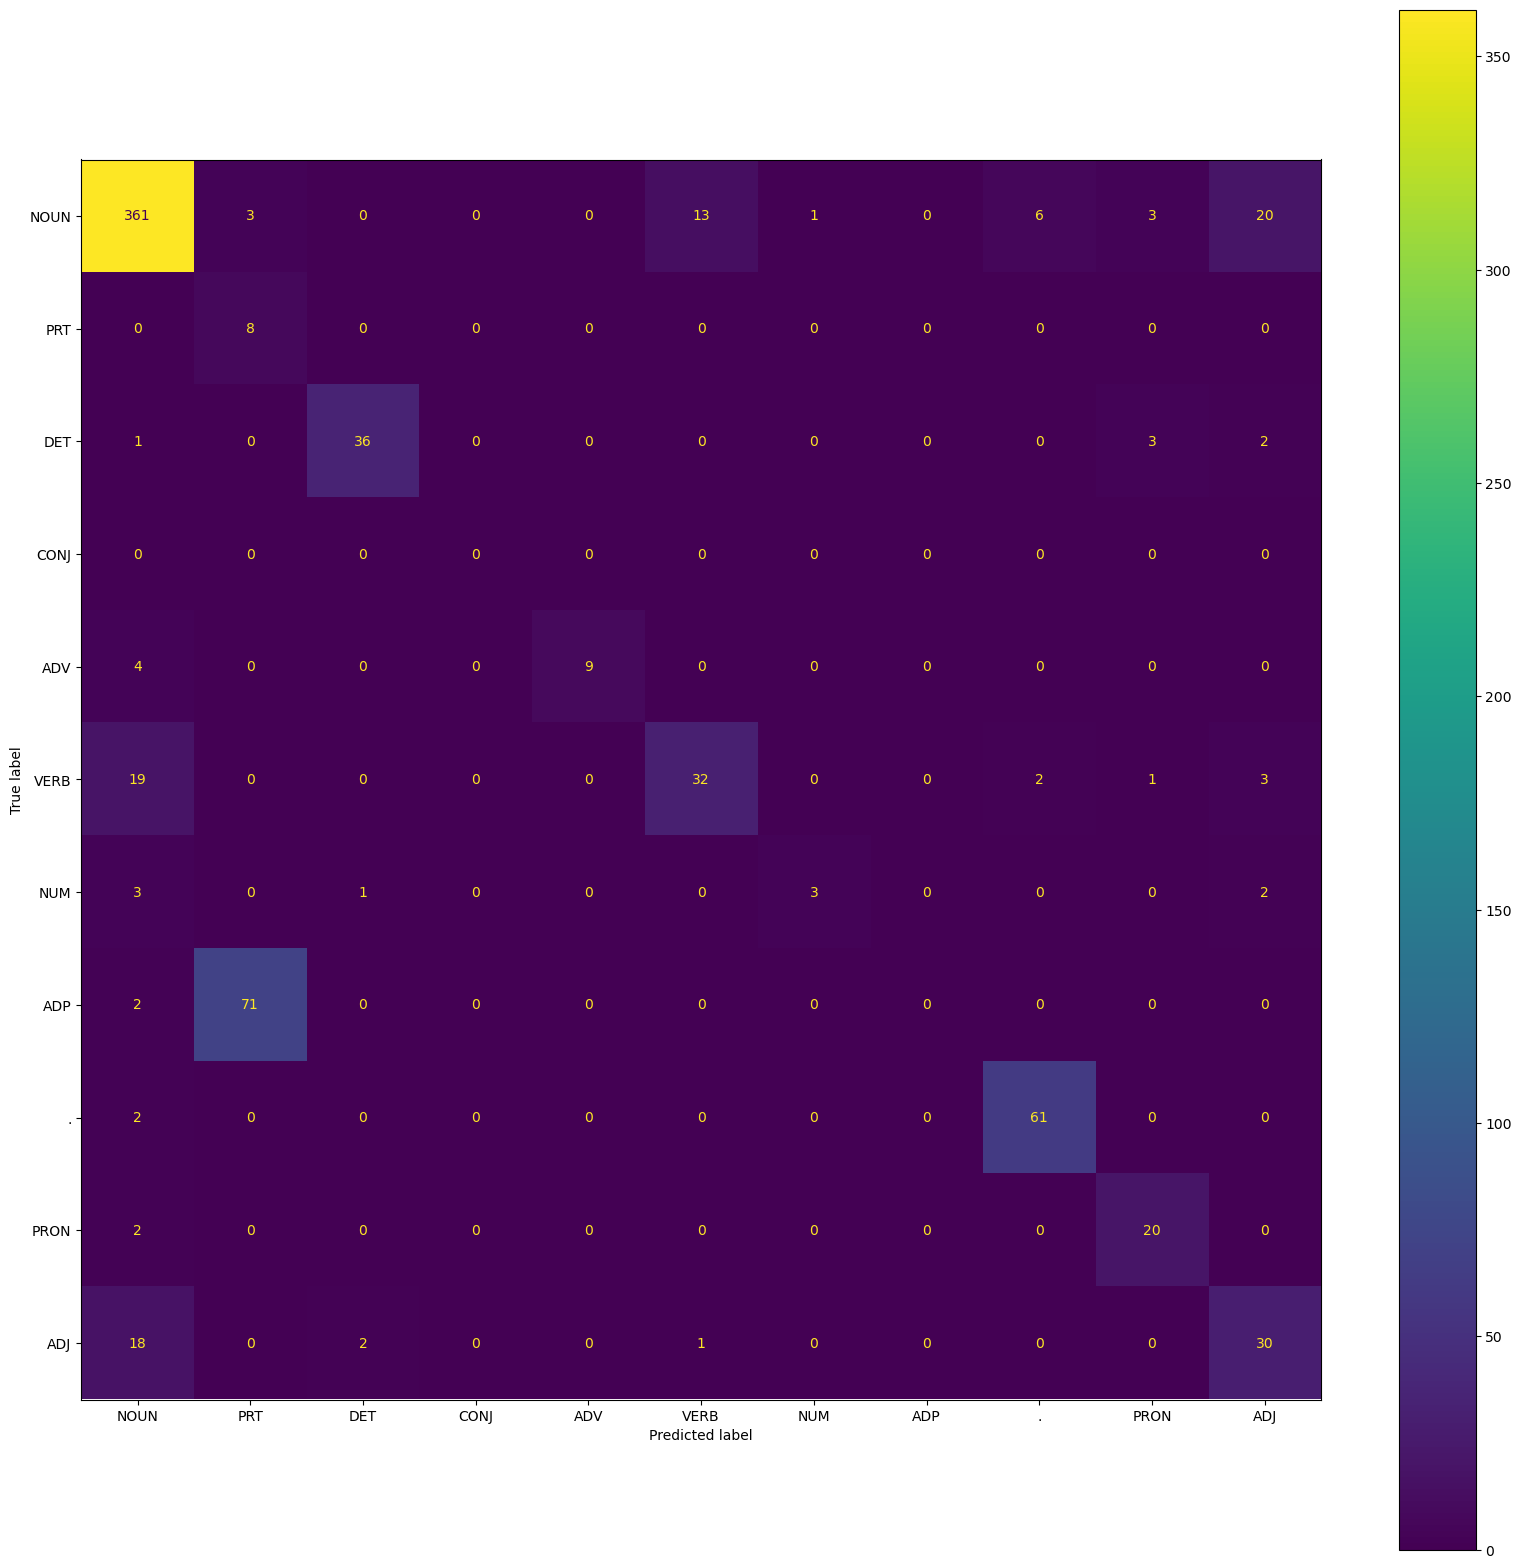

In [22]:
def evaluate_mastodon(tokenized_data, nltk_tags, show_data=True):
    """
    Evaluates the performance of the Viterbi algorithm using tokenized and lemmatized Mastodon data.

    Parameters:
    - tokenized_data: List of lists where each sublist contains tuples (token, lemma, nltk_tag).
    - nltk_tags: List of lists containing NLTK tags for each token.
    - show_data: Whether to display detailed classification reports and confusion matrices.

    Returns:
    - total_mistakes: Total number of mismatches between predicted and gold tags.
    - total_tokens: Total number of tokens evaluated.
    """
    list_gold, list_pred = [], []
    total_mistakes, total_tokens = 0, 0

    # Iterate through tokenized data and corresponding NLTK tags
    for sentence_data, gold_tags in zip(tokenized_data, nltk_tags):
        #print(f"Sentence data: {sentence_data}")
        # Extract lemmatized tokens for prediction
        new_sent = [lemma.lower() for token, lemma, pos in sentence_data[0]]
        #print(f"Tokens (new_sent): {new_sent}")
        total_tokens += len(new_sent)
        list_gold.extend(gold_tags[0])

        # Use Viterbi to predict tags
        checked_sentence, predicted_tags, _ = viterbi(
            new_sent,
            init_matrix,
            transition_matrix.values,
            emission_matrix.values,
            word_to_index,
            category_to_index,
            index_to_category,
        )

        #print(f"Predicted tags: {predicted_tags}")
        #print(f"Predicted tags before normalization: {predicted_tags}")  # Debug: Check predicted tags

        # Normalize predicted tags to match NLTK tags
        predicted_tags = [normalize_tag(tag) for tag in predicted_tags]

        #print(f"Predicted tags after normalization: {predicted_tags}")

        # Ensure pre-processing consistency
        assert len(gold_tags[0]) == len(predicted_tags), (
            f"The length of the tokenized sentence ({len(new_sent)}) and predicted tags ({len(predicted_tags)}) do not match."
        )
        list_pred.extend(predicted_tags)

        # Count mistakes
        total_mistakes += sum(
            1 for pred, gold in zip(predicted_tags, gold_tags[0]) if pred != gold
        )

    if show_data:
        # Print classification report
        report = classification_report(list_gold, list_pred, zero_division=0, digits=4)
        print(report)

        # Generate and display confusion matrix
        cm = confusion_matrix(list_gold, list_pred, labels=list(set(list_gold)))
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(set(list_gold)))
        fig, ax = plt.subplots(figsize=(20, 20))
        disp.plot(ax=ax)

    # Return number of mistakes and total tokens
    return total_mistakes, total_tokens

# Example usage:
# Assuming `mastodon_data` contains tokenized and lemmatized data as [(token, lemma, nltk_tag), ...]
# and `nltk_tags` contains corresponding NLTK tags
# mastodon_data = [[("This", "this", "DET"), ("is", "be", "VERB"), ...], ...]
# nltk_tags = [["DET", "VERB", ...], ...]

# Extract processed data from the DataFrame
mastodon_data = df_data_annotated['tokenized_lemmatized_tagged'].tolist()
nltk_tags = df_data_annotated['pos_tags_per_sentence'].tolist()

# Evaluate the model
total_mistakes, total_tokens = evaluate_mastodon(mastodon_data, nltk_tags, show_data=True)
print(f"Accuracy: {100 - (100 * total_mistakes / total_tokens):.2f}%")

**Detailed Analysis of the performance over Mastodon Data**

The model achieved an **accuracy of 69.39%**, indicating moderate effectiveness in predicting POS tags.

---

**Class-wise Performance**

**Well-predicted Classes:**

- **NOUN (Nouns)**: Nouns are another strong category, achieving an **F1-score of 0.8647**, reflecting high recall and precision.
- **DET (Determiners)**: Determiners are effectively predicted, with an **F1-score of 0.8889**.
- **PRON (Pronouns)**: Pronouns perform well, with a **recall of 0.9091** and an **F1-score of 0.8163**.

**Moderately Predicted Classes:**

- **ADJ (Adjectives)**: The model achieves moderate performance for adjectives, with a **precision of 0.5263**, a **recall of 0.5660**, and an **F1-score of 0.5455**.
- **ADV (Adverbs)**: Adverbs are predicted with high **precision (1.0)** but a lower **recall (0.6923)**, resulting in an **F1-score of 0.8182**.

**Poorly Predicted or Unrecognized Classes:**

- **ADP (Adpositions), CONJ (Conjunctions), AUX (Auxiliary verbs), CCONJ (Coordinating conjunctions), PART (Particles), SCONJ (Subordinating conjunctions), STOP (Stopwords), and SYM (Symbols)**: These categories are completely unrecognized, with zero predictions. This is reflected in the **precision, recall, and F1-score values of 0.0**.
- **PRT (Particles)**: Particles are poorly predicted, with an **F1-score of 0.1600**, reflecting significant misclassification or lack of generalization.

---

**Impact of Class Imbalance**

The results suggest that the model struggles with infrequent or less-represented classes in the training data. Classes like **AUX**, **CCONJ**, and **SCONJ** likely have minimal representation, leading to the model failing to generalize. Conversely, frequent classes such as **NOUN** and **DET** benefit from richer training data, resulting in better performance.


# Conclusions


Our initial hypothesis was that a large corpus containing data from a wide variety of sources would give us a model fairly robust to domain shift, while maintaining a high accuracy in the domains it was trained on.

The in-domain experiments show that the second part of our hypothesis is correct. The model holds a more than respectable accuracy on all the domains present in the GUM corpus. The test sentences were also fairly complex, making use of a great variety of vocabulary and syntactic structures, and the model is able to comforably keep up with them.

Regarding the robustness of the model to domain shifts, it's moderate. For domains that may hold similar structures moro common in the English language as a whole, such as e-sports commentary or death threats, the model achieves close to 90% accuracy. However, in highly specialised contexts, such as mathematical demonstrations, accuracy drops drastically to 70%, indicating difficulties in adapting to vocabularies or syntactic structures particular to these domains.

Similar results can be seen when using very informal data, as that one can expect to retrieve on social media. Here, our model achived an overall accuracy of slightly below 70%.
This result reflects reasonable performance, but shows clear limitations in its ability to adapt to less structured text and linguistic features of social.

It's interesting how on this Mastodon data, the model showed solid performance in predicting the most frequent categories, such as nouns, determiners and pronouns. These classes seem to maintain their performance even in domains with significant stylistic variation. However, the model performed was less than satisfactory on less frequent or more context-dependent categories, such as adpositions, auxiliary verbs, coordinating conjunctions, particles, etc. These classes were barely detected, which highlights the limitations of the model in contexts where grammatical structures are less predictable or more informal.

In summary, although it achieves good results in moderately structured domains, its sensitivity to domain-specific characteristics limit its robustness to domain changes. It's beyond the scope of this project, but remains of interest, how performance for this ultra-specific domains would vary by changing the size of the training data, and whether even bigger corpora than ours could see any improvement, or the model already performs as good as the algorithm its based on can.